In [315]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [318]:

def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf

def readStock(filename):
    basePath = "/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    

    return minMaxScale(df1)



In [319]:
fordDf = readStock("Ford.csv")
gmDf= readStock("GM.csv")
mahindraDf= readStock("M&M.NS.csv")
marutiDf= readStock("MARUTI.NS.csv")
mercedesDf= readStock("MARUTI.NS.csv")
stlaDf= readStock("STLA.csv")
tataMotorsDf= readStock("TATAMOTORS.csv")
toyotaDf= readStock("Toyota.csv")
teslaDf = readStock("TSLA.csv")
vow3Df= readStock("VOW3.DE.csv")

In [320]:
fordDf.head(10)

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
5,2013-01-09,0.427972,0.462028,0.098008
6,2013-01-10,0.443823,0.476237,0.255341
7,2013-01-11,0.449883,0.487016,0.198716
8,2013-01-14,0.450350,0.485056,0.128387
9,2013-01-15,0.460606,0.486526,0.158600


In [321]:
AutoMobile_df = pd.concat([fordDf,gmDf,mahindraDf,mercedesDf,stlaDf,
                          tataMotorsDf,toyotaDf,teslaDf,vow3Df])

In [322]:
AutoMobile_df.head(10)

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
5,2013-01-09,0.427972,0.462028,0.098008
6,2013-01-10,0.443823,0.476237,0.255341
7,2013-01-11,0.449883,0.487016,0.198716
8,2013-01-14,0.450350,0.485056,0.128387
9,2013-01-15,0.460606,0.486526,0.158600


In [323]:
AutoMobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22688 entries, 0 to 2549
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22688 non-null  datetime64[ns]
 1   High    22684 non-null  float64       
 2   Low     22684 non-null  float64       
 3   Volume  22684 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 886.2 KB


In [324]:
AutoMobile_df.head(10)

,Date,High,Low,Volume
0,2013-01-02,0.413054,0.442920,0.223784
1,2013-01-03,0.432634,0.445370,0.374876
2,2013-01-04,0.428438,0.460069,0.156120
3,2013-01-07,0.427040,0.460069,0.119381
4,2013-01-08,0.420047,0.452719,0.128753
5,2013-01-09,0.427972,0.462028,0.098008
6,2013-01-10,0.443823,0.476237,0.255341
7,2013-01-11,0.449883,0.487016,0.198716
8,2013-01-14,0.450350,0.485056,0.128387
9,2013-01-15,0.460606,0.486526,0.158600


In [325]:
df_Auto = AutoMobile_df.groupby('Date')[['High','Low','Volume']].mean().dropna()

In [326]:
df_Auto.head(10)

,High,Low,Volume
Date,,,
2013-01-01,0.102932,0.116431,0.032780
2013-01-02,0.213810,0.233270,0.122787
2013-01-03,0.216418,0.234956,0.126092
2013-01-04,0.215005,0.238389,0.094290
2013-01-07,0.213552,0.235734,0.076368
2013-01-08,0.210749,0.232655,0.082763
2013-01-09,0.217832,0.237520,0.111674
2013-01-10,0.221073,0.243477,0.099711
2013-01-11,0.222354,0.243732,0.084392


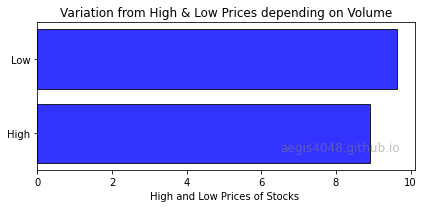

In [327]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

######################################## Data preparation #########################################
df_Auto.head(10)

features = ['High','Low','Volume']

######################################## Train/test split #########################################

df_train, df_test = train_test_split(df_Auto, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Volume',axis=1), df_train['Volume']
X_test, y_test = df_test.drop('Volume',axis=1), df_test['Volume']

################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='blue', alpha=0.8, edgecolor='k')
ax.set_xlabel('High and Low Prices of Stocks ')
ax.set_title('Variation from High & Low Prices depending on Volume')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

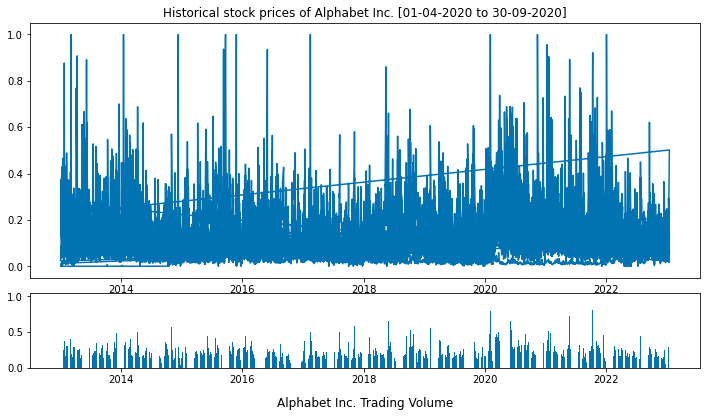

In [328]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2023-01-18')                         
#df['Date'] = pd.to_datetime(df['Date']) 
new_df = (AutoMobile_df['Date']>= start_date) & (AutoMobile_df['Date']<= end_date)
df1 = AutoMobile_df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["Volume"])
plt.title('Historical stock prices of Alphabet Inc. [01-04-2020 to 30-09-2020]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAlphabet Inc. Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

In [329]:
AutoMobile_df.to_csv('Scaled_Data.csv', encoding='utf-8')

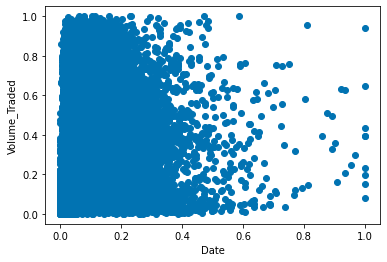

In [330]:
plt.scatter(AutoMobile_df.Volume, AutoMobile_df.High)
plt.ylabel('Volume_Traded')
plt.xlabel('Date')
plt.show()

In [331]:
from sklearn.linear_model import LinearRegression

In [332]:
y = df_Auto['Volume']
y.shape

(2608,)

In [333]:
X = df_Auto[['High','Low']]



In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [335]:
model = LinearRegression()

In [336]:
model.fit(X, y)

LinearRegression()

In [337]:
y_pred = model.predict(X)
print(y_pred.shape)

(2608,)


In [338]:
y_pred


array([0.15014457, 0.11607768, 0.1198662 , ..., 0.0421172 , 0.09396698,
       0.1086962 ])

In [339]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.21617306141037118
Coefficients: [ 4.24424104 -4.3192621 ]


In [340]:


r2 = model.score(X, y)

In [341]:
r2


0.4424808935879482

In [342]:
print(model.coef_)
print(model.intercept_)

[ 4.24424104 -4.3192621 ]
0.21617306141037118
